# Install Required Libraries

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn

# load and inspect data

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, Normalizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
# Load data

db = pd.read_excel("C:/Users/vipin/OneDrive/Documents/Desktop/Project5/Notebook/telcom_data.xlsx")
db

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


# Inspection of data

In [5]:
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [7]:
db.shape

(150001, 55)

In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [9]:
db.describe()

,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000,150000.000000,150000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,2019-04-26 12:36:38.953740032,499.188200,2019-04-27 17:40:08.059673344,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
min,2019-04-04 12:01:18,0.000000,2019-04-24 22:59:58,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,2019-04-25 00:26:00.750000128,250.000000,2019-04-26 07:30:11.500000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,2019-04-26 08:51:24.500000,499.000000,2019-04-27 23:02:05,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,2019-04-27 18:18:59.750000128,749.000000,2019-04-29 07:15:07.500000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,2019-04-29 07:28:43,999.000000,2019-04-30 23:59:27,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08
std,NaN,288.611834,NaN,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08


In [10]:
numeric_cols = db.select_dtypes(include=['float64', 'int64']).columns
print(db[numeric_cols].skew())

Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         41.045956
MSISDN/Number                               332.155856
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < UL TP < 50 Kbps (%)                10.943888
50 Kbps < 

# Data Cleaning

In [11]:
def percent_missing(df):
    total_cells = np.product(df.shape)
    missing_count = df.isnull().sum()
    total_missing = missing_count.sum()
    missing_percentage = (total_missing / total_cells) * 100
    print(f"The Telecom dataset contains {round(missing_percentage, 2)}% missing values.")

percent_missing(db)

The Telecom dataset contains 12.49% missing values.


In [12]:
print(db.isnull().sum())

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [13]:
def drop_columns_with_missing_values(db, columns_to_drop):
    return db.drop(columns=columns_to_drop)

# Handling Missing Value

In [14]:
def preprocess_data(db):
    print("Initial db shape:", db.shape)
    
    db = db.dropna(thresh=len(db.columns) * 0.8)
    print("After dropping rows with >20% NaNs:", db.shape)
    
    numeric_cols = db.select_dtypes(include=['float64', 'int64']).columns
    db[numeric_cols] = db[numeric_cols].fillna(db[numeric_cols].median())
    print("After filling NaNs in numeric columns:", db.shape)
    
    categorical_cols = db.select_dtypes(include=['object']).columns
    db[categorical_cols] = db[categorical_cols].fillna(db[categorical_cols].mode().iloc[0])
    print("After filling NaNs in categorical columns:", db.shape)
    
    if 'Dur. (ms)' in db.columns:
        db['Dur. (ms)'] = db['Dur. (ms)'].astype('int64')
        print("After converting 'Dur. (ms)' to int:", db['Dur. (ms)'].dtype)
    
    db = db.drop_duplicates()
    db.reset_index(drop=True, inplace=True)
    print("After removing duplicates:", db.shape)
    
    return db

clean_data = preprocess_data(db)
clean_data.head()  # Check the first few rows of the processed data


Initial db shape: (150001, 55)
After dropping rows with >20% NaNs: (122221, 55)
After filling NaNs in numeric columns: (122221, 55)
After filling NaNs in categorical columns: (122221, 55)
After converting 'Dur. (ms)' to int: int64
After removing duplicates: (122221, 55)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483501243799552,2019-04-13 08:41:59,612.0,2019-04-25 08:16:21,168.0,1035261,2.082014e+14,3.366537e+10,8.676270e+13,9164567010589190,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
3,13042425910865399808,2019-04-14 02:11:59,592.0,2019-04-25 02:26:52,512.0,951292,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
4,13042425914669299712,2019-04-15 00:32:15,0.0,2019-04-25 00:40:17,284.0,864482,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [15]:


if clean_data is not None:
    print(clean_data.head())
    
    scaler = MinMaxScaler()
    numeric_cols = clean_data.select_dtypes(include=['float64', 'int64']).columns
    clean_data[numeric_cols] = scaler.fit_transform(clean_data[numeric_cols])

    print(clean_data.head())
else:
    print("The preprocessing function returned None.")

              Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483501243799552 2019-04-13 08:41:59     612.0 2019-04-25 08:16:21   
3  13042425910865399808 2019-04-14 02:11:59     592.0 2019-04-25 02:26:52   
4  13042425914669299712 2019-04-15 00:32:15       0.0 2019-04-25 00:40:17   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0    1823652  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0    1365104  2.082019e+14   3.368185e+10  3.579401e+13   
2   168.0    1035261  2.082014e+14   3.366537e+10  8.676270e+13   
3   512.0     951292  2.082010e+14   3.376349e+10  8.654640e+13   
4   284.0     864482  2.082003e+14   3.365922e+10  3.557311e+13   

     Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0      9164566995485190  ...          15854611.0           250

In [16]:
def scale_data(db, scaler):
    numeric_cols = db.select_dtypes(include=['float64', 'int64']).columns
    db[numeric_cols] = scaler.fit_transform(db[numeric_cols])
    return db


In [17]:
clean_data.columns.unique()

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [18]:
clean_data[['Start', 'End']]

,Start,End
0,2019-04-04 12:01:18,2019-04-25 14:35:31
1,2019-04-09 13:04:04,2019-04-25 08:15:48
2,2019-04-13 08:41:59,2019-04-25 08:16:21
3,2019-04-14 02:11:59,2019-04-25 02:26:52
4,2019-04-15 00:32:15,2019-04-25 00:40:17
...,...,...
122216,2019-04-29 07:28:41,2019-04-30 00:01:49
122217,2019-04-29 07:28:42,2019-04-30 06:02:33
122218,2019-04-29 07:28:42,2019-04-30 10:41:33
122219,2019-04-29 07:28:43,2019-04-30 10:46:12


In [19]:
clean_data.isnull().count().sum()

6722155

In [20]:
#drop nan value
clean_data.dropna(subset=['Bearer Id', 'MSISDN/Number'], inplace=True)

In [21]:
clean_data.isna().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [22]:

clean_data.dtypes.unique()

array([dtype('O'), dtype('<M8[ns]'), dtype('float64')], dtype=object)

In [23]:
#save the cleaned data 
clean_data.to_csv("C:/Users/vipin/OneDrive/Documents/Desktop/Project5/Notebook/cleaned_data.csv")

In [24]:
minmax_scaler = MinMaxScaler()

# Generate 2000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

# Display a sample of 5 data points
print(original_data.sample(5))

               0
268    26.632625
1567   26.836321
94     10.567135
1430  149.119276
1426  154.316772


In [25]:
original_data[0].min(), original_data[0].max()

(0.2745955436501688, 1948.9116431498412)

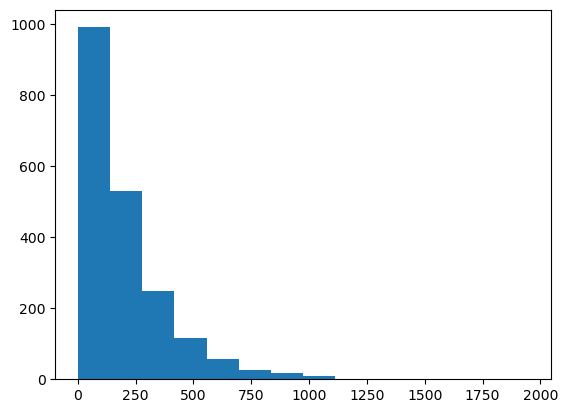

In [26]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

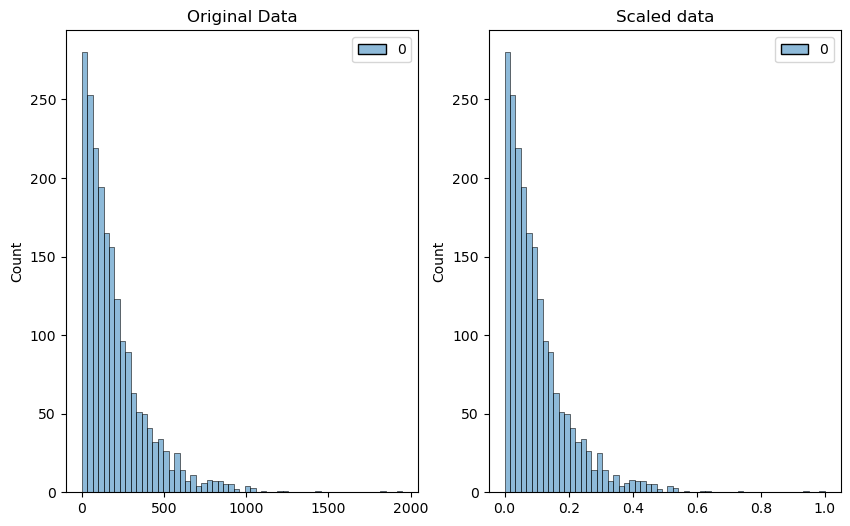

In [27]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

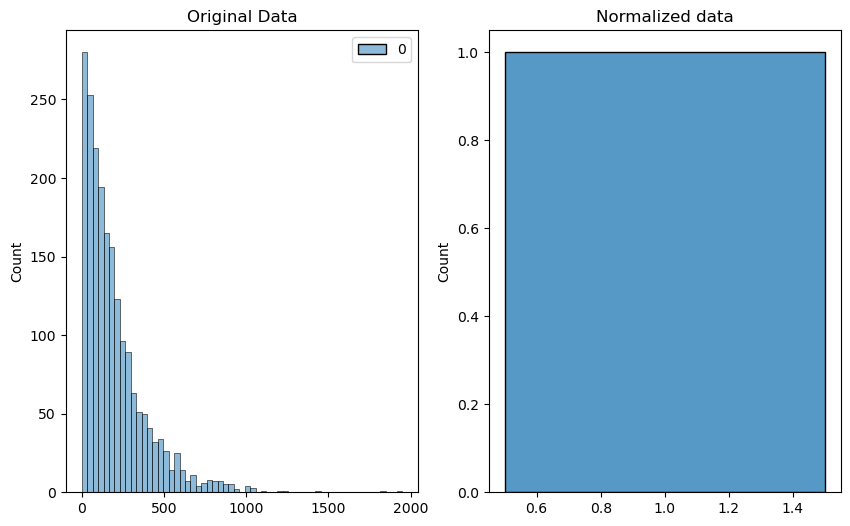

In [28]:
from sklearn.preprocessing import Normalizer # type: ignore

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [29]:
# check datatypes
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122221 entries, 0 to 122220
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 122221 non-null  object        
 1   Start                                     122221 non-null  datetime64[ns]
 2   Start ms                                  122221 non-null  float64       
 3   End                                       122221 non-null  datetime64[ns]
 4   End ms                                    122221 non-null  float64       
 5   Dur. (ms)                                 122221 non-null  float64       
 6   IMSI                                      122221 non-null  float64       
 7   MSISDN/Number                             122221 non-null  float64       
 8   IMEI                                      122221 non-null  float64       
 9   Last Location N

# Exploration

*  detection of mistakes, outliers or abnormalities
*  determining relationships among the explanatory variables
*  assessing the relationships between explanatory and outcome variables

In [30]:
db2 = pd.read_csv("C:/Users/vipin/OneDrive/Documents/Desktop/Project5/Notebook/cleaned_data.csv")
db2

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,13114483460844900352,2019-04-04 12:01:18,0.770771,2019-04-25 14:35:31,0.662663,0.980734,0.000229,0.338423,0.355932,...,0.681651,0.113631,0.352502,0.438681,0.329689,0.866255,0.203610,0.532305,0.438030,0.338155
1,1,13114483482878900224,2019-04-09 13:04:04,0.235235,2019-04-25 08:15:48,0.606607,0.733164,0.000308,0.427802,0.358700,...,0.870515,0.868242,0.788437,0.782626,0.721741,0.070697,0.624700,0.909194,0.668468,0.724204
2,2,13114483501243799552,2019-04-13 08:41:59,0.612613,2019-04-25 08:16:21,0.168168,0.555082,0.000229,0.340572,0.875828,...,0.311037,0.085690,0.568850,0.816909,0.053097,0.850601,0.952825,0.643147,0.589066,0.071099
3,3,13042425910865399808,2019-04-14 02:11:59,0.592593,2019-04-25 02:26:52,0.512513,0.509747,0.000155,0.859747,0.873634,...,0.524086,0.896566,0.294871,0.548574,0.887915,0.975290,0.637384,0.465891,0.736213,0.860877
4,4,13042425914669299712,2019-04-15 00:32:15,0.000000,2019-04-25 00:40:17,0.284284,0.462878,0.000036,0.308039,0.356458,...,0.702449,0.298616,0.525002,0.044256,0.961957,0.096093,0.076879,0.773921,0.244338,0.945168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122216,122216,13042425979329300480,2019-04-29 07:28:41,0.615616,2019-04-30 00:01:49,0.407407,0.028315,0.000222,0.357928,0.354017,...,0.281630,0.817879,0.966026,0.324810,0.930040,0.768458,0.381027,0.899250,0.667724,0.909809
122217,122217,7277825670196679680,2019-04-29 07:28:42,0.451451,2019-04-30 06:02:33,0.214214,0.040000,0.000358,0.262900,0.355545,...,0.696143,0.534408,0.768887,0.893976,0.624352,0.555426,0.003854,0.814516,0.720209,0.635442
122218,122218,7349883264234609664,2019-04-29 07:28:42,0.483483,2019-04-30 10:41:33,0.187187,0.049038,0.000308,0.330422,0.357345,...,0.596636,0.376532,0.831935,0.967345,0.743252,0.285950,0.844371,0.148419,0.470268,0.739067
122219,122219,13114483573367300096,2019-04-29 07:28:43,0.283283,2019-04-30 10:46:12,0.810811,0.049189,0.000274,0.110523,0.357961,...,0.974264,0.084309,0.428386,0.230136,0.656281,0.808894,0.143565,0.683305,0.413196,0.656298


In [31]:
db2.dtypes

Unnamed: 0                                    int64
Bearer Id                                    object
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < D

# Non-Graphical Univariate Analysis

In [32]:
# statistical information
db2.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,122221.0,61110.000000,35282.307963,0.0,30555.000000,61110.000000,91665.000000,122220.0
Start ms,122221.0,0.499189,0.289134,0.0,0.249249,0.498498,0.749750,1.0
End ms,122221.0,0.499629,0.288245,0.0,0.251251,0.500501,0.749750,1.0
Dur. (ms),122221.0,0.047769,0.039593,0.0,0.023059,0.042791,0.058245,1.0
IMSI,122221.0,0.000270,0.002868,0.0,0.000221,0.000246,0.000284,1.0
MSISDN/Number,122221.0,0.389339,0.237048,0.0,0.269597,0.331585,0.432556,1.0
IMEI,122221.0,0.512207,0.240051,0.0,0.355957,0.358107,0.871914,1.0
Avg RTT DL (ms),122221.0,0.001118,0.006109,0.0,0.000330,0.000464,0.000722,1.0
Avg RTT UL (ms),122221.0,0.002478,0.011905,0.0,0.000281,0.000702,0.002107,1.0
Avg Bearer TP DL (kbps),122221.0,0.043127,0.067742,0.0,0.000119,0.001727,0.070431,1.0


<Axes: >

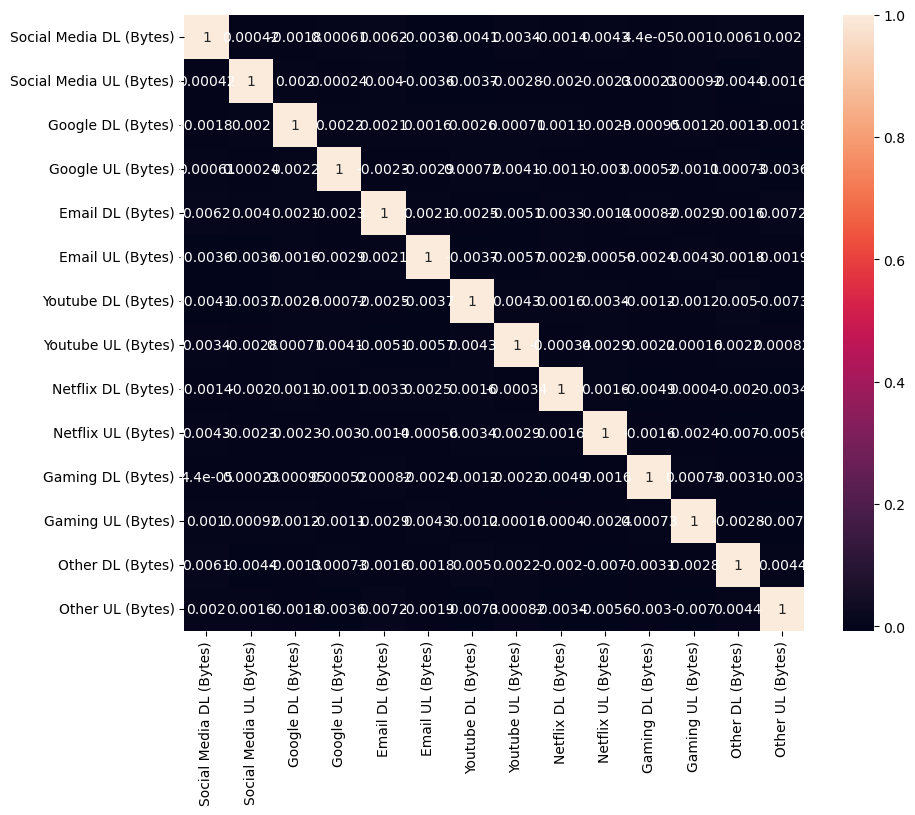

In [33]:
cols = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
            'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
            'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
            'Other DL (Bytes)', 'Other UL (Bytes)']
data_corr = db2[cols]
plt.figure(figsize=[10,8])
sns.heatmap(data_corr.corr(), annot = True, square=False,)

In [34]:
# Ensure the dataset has at least 6000 rows, or adjust sample size accordingly
sample_size = min(2000, len(db2))

# Select only numeric columns
numeric_cols = db2.select_dtypes(include=['float64', 'int64']).columns

# Drop rows with missing data in numeric columns for better plotting
db2_clean = db2[numeric_cols].dropna()

# Now, generate the pairplot
sns.pairplot(db2_clean.sample(sample_size), diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'g'}, height=4)
plt.show()


In [ ]:
sns.pairplot(db2.sample(3000), diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'g'},height=4)
plt.show()